In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

soil = pd.read_csv("data/raw/soil_samples.csv")
water = pd.read_csv("data/raw/water_quality.csv")
air = pd.read_csv("data/raw/air_metrics.csv")

soil.head(), water.head(), air.head()



(  plot_id  nitrogen_pct  phosphorus_ppm  potassium_ppm  soil_carbon_pct    ph  \
 0    P001         0.212              22            132             3.67  6.10   
 1    P002         0.385              16            147             5.53  6.47   
 2    P003         0.320               6            250             3.30  5.25   
 3    P004         0.280              14            161             2.49  5.01   
 4    P005         0.147               8            136             3.43  6.14   
 
   erosion_risk  
 0          low  
 1       medium  
 2       medium  
 3          low  
 4       medium  ,
   plot_id    ph  temperature_c  dissolved_oxygen_mg_per_l  turbidity_ntu  \
 0    P001  6.92           29.3                       5.03           17.1   
 1    P002  6.61           25.5                       5.37            7.2   
 2    P003  6.09           23.9                       5.07           28.4   
 3    P004  6.34           22.8                       5.89           23.7   
 4    P005  

In [2]:
def health_score(row):
    # Scale soil carbon from 2–6% → 0–1
    carbon_score = (row["soil_carbon_pct"] - 2.0) / (6.0 - 2.0)
    # Best pH around 6, penalize being far from 6
    ph_score = 1.0 - abs(row["ph"] - 6.0) / 2.0
    return max(0.0, min(1.0, 0.5 * carbon_score + 0.5 * ph_score))

soil["health_score"] = soil.apply(health_score, axis=1)
soil[["plot_id", "soil_carbon_pct", "ph", "health_score"]].head()


,plot_id,soil_carbon_pct,ph,health_score
0,P001,3.67,6.10,0.68375
1,P002,5.53,6.47,0.82375
2,P003,3.30,5.25,0.47500
3,P004,2.49,5.01,0.31375
4,P005,3.43,6.14,0.64375


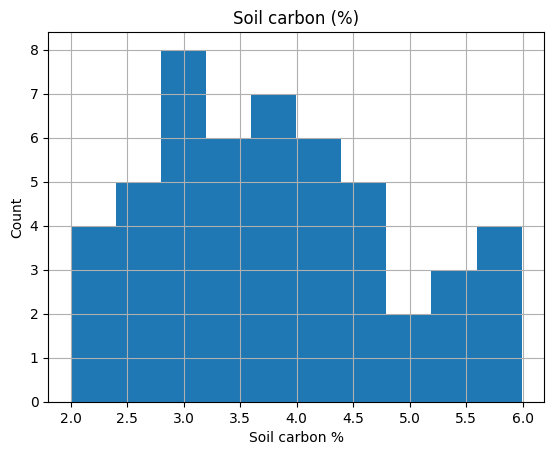

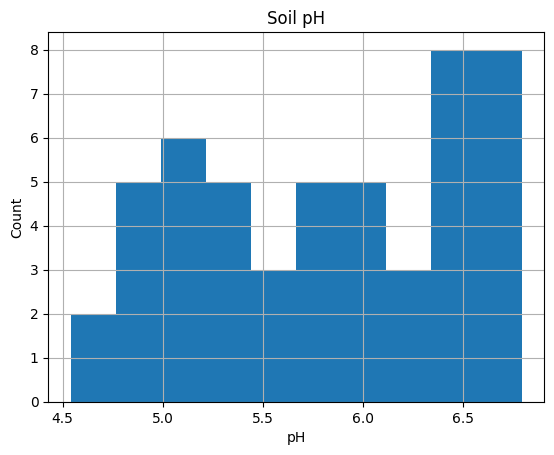

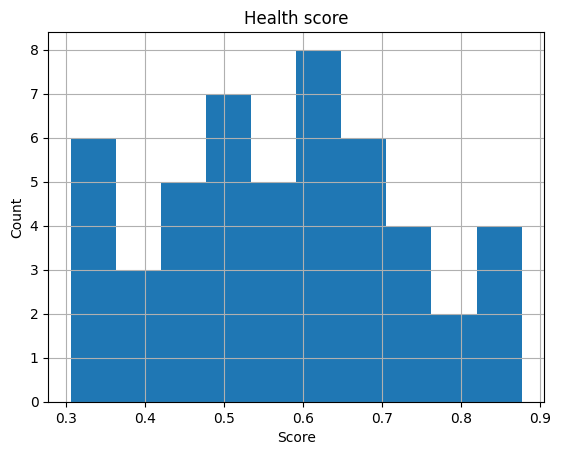

In [3]:
plt.figure()
soil["soil_carbon_pct"].hist()
plt.title("Soil carbon (%)")
plt.xlabel("Soil carbon %")
plt.ylabel("Count")

plt.figure()
soil["ph"].hist()
plt.title("Soil pH")
plt.xlabel("pH")
plt.ylabel("Count")

plt.figure()
soil["health_score"].hist()
plt.title("Health score")
plt.xlabel("Score")
plt.ylabel("Count")

plt.show()


In [4]:
env = soil.merge(water, on="plot_id", suffixes=("_soil", "_water"))
env = env.merge(air, on="plot_id")

env.head()



,plot_id,nitrogen_pct,phosphorus_ppm,potassium_ppm,soil_carbon_pct,ph_soil,erosion_risk,health_score,ph_water,temperature_c,dissolved_oxygen_mg_per_l,turbidity_ntu,mercury_ug_per_l,co2_ppm,ch4_ppb,smoke_index,relative_humidity_pct
0,P001,0.212,22,132,3.67,6.10,low,0.68375,6.92,29.3,5.03,17.1,0.376,413.6,1727.3,35,83.5
1,P002,0.385,16,147,5.53,6.47,medium,0.82375,6.61,25.5,5.37,7.2,0.287,449.0,1917.9,0,82.6
2,P003,0.320,6,250,3.30,5.25,medium,0.47500,6.09,23.9,5.07,28.4,0.810,406.4,1864.2,7,75.2
3,P004,0.280,14,161,2.49,5.01,low,0.31375,6.34,22.8,5.89,23.7,1.906,432.5,1835.3,98,73.5
4,P005,0.147,8,136,3.43,6.14,medium,0.64375,6.01,23.5,4.19,4.3,0.406,407.5,1973.1,51,96.0
